In [1]:
import requests
import numpy

In [2]:
import datetime
time_base = datetime.datetime.now()- datetime.timedelta(minutes=1)
time_end = time_base
time_start = time_base - datetime.timedelta(minutes=5)

print(datetime.datetime.isoformat(time_start))
print(datetime.datetime.isoformat(time_end))

2016-07-13T15:49:37.701334
2016-07-13T15:54:37.701334


In [3]:
time_start.strftime("%Y-%m-%dT%H:%M:%S")

'2016-07-13T15:49:37'

In [4]:
# channel_name = 'SINSB02-RIQM-DCP10:FOR-PHASE-AVG'
channel_names = ['SINSB01-RLLE-STA:MASTER-CPUTIMER', 'SINSB01-RLLE-STA:SLAVE1-CPUTIMER']
# start = '2016-07-08T08:28:00.000+02:00'
# end = '2016-07-08T08:28:10.000+02:00'
# 
# start = time_start.strftime("%Y-%m-%dT%H:%M:%S")
# end = time_end.strftime("%Y-%m-%dT%H:%M:%S")
start = datetime.datetime.isoformat(time_start)
end = datetime.datetime.isoformat(time_end)
print(start)
print(end)
data={"channels": channel_names, "range":{"startDate": start,  "endDate":end}}

2016-07-13T15:49:37.701334
2016-07-13T15:54:37.701334


In [5]:
response = requests.post('http://data-api.psi.ch/sf/query', json=data)

In [6]:
data = response.json()

In [9]:
value_channel_0=[]
for x in data[0]['data']:
    value_channel_0.append(x['value'])
value_channel_1=[]
for x in data[1]['data']:
    value_channel_1.append(x['value'])

In [10]:
# difference channel 0 and 1
difference = numpy.asarray(value_channel_0) - numpy.asarray(value_channel_1)

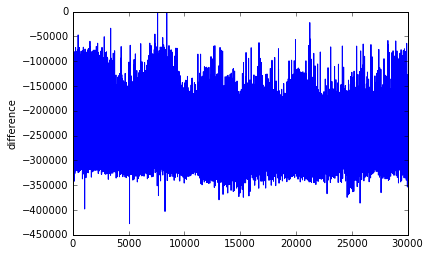

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(difference)
plt.ylabel('difference')
plt.show()